In [199]:
# Libraries used 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


<H3> Exploratory Data Analysis (EDA)

In [2]:
df.head(5)

NameError: name 'df' is not defined

<h3> Data Description </h3>

This analyse helps the bank figure out if someone might be interested in saving money with them for a fixed amount of time.


![Alt Text](DicTable.png)


<p><h4>What's the Goal?</h4></p>
<p>The goal is to use all this information to predict whether someone will end up saving money with the bank.</p> This helps the bank decide who to focus on when they're trying to get people to save money with them.




In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

<h4> Univariable Check


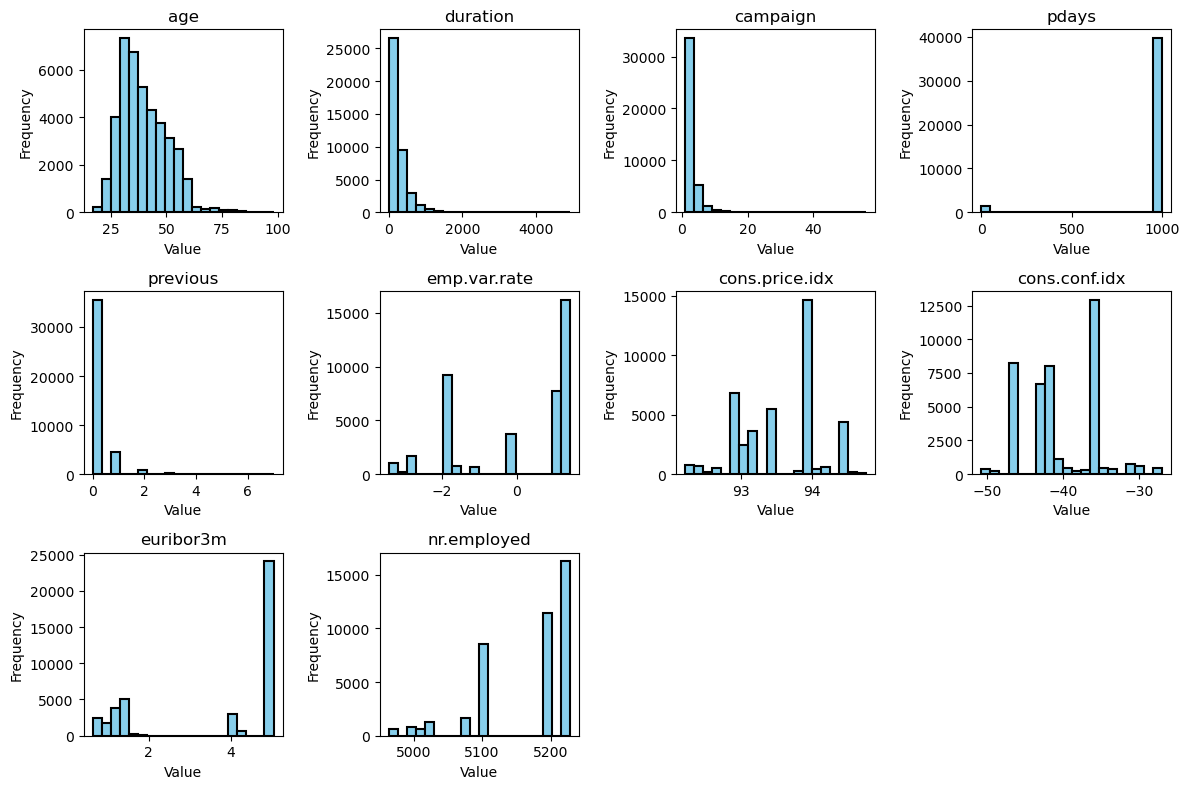

In [151]:
# Numerical Columns
numerical_columns = ['age', 'duration', 'campaign', 'pdays', 'previous',
                     'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
                     'euribor3m', 'nr.employed']

plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i)
    plt.hist(df[column], bins=20, color='skyblue', edgecolor='black', linewidth=1.5)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


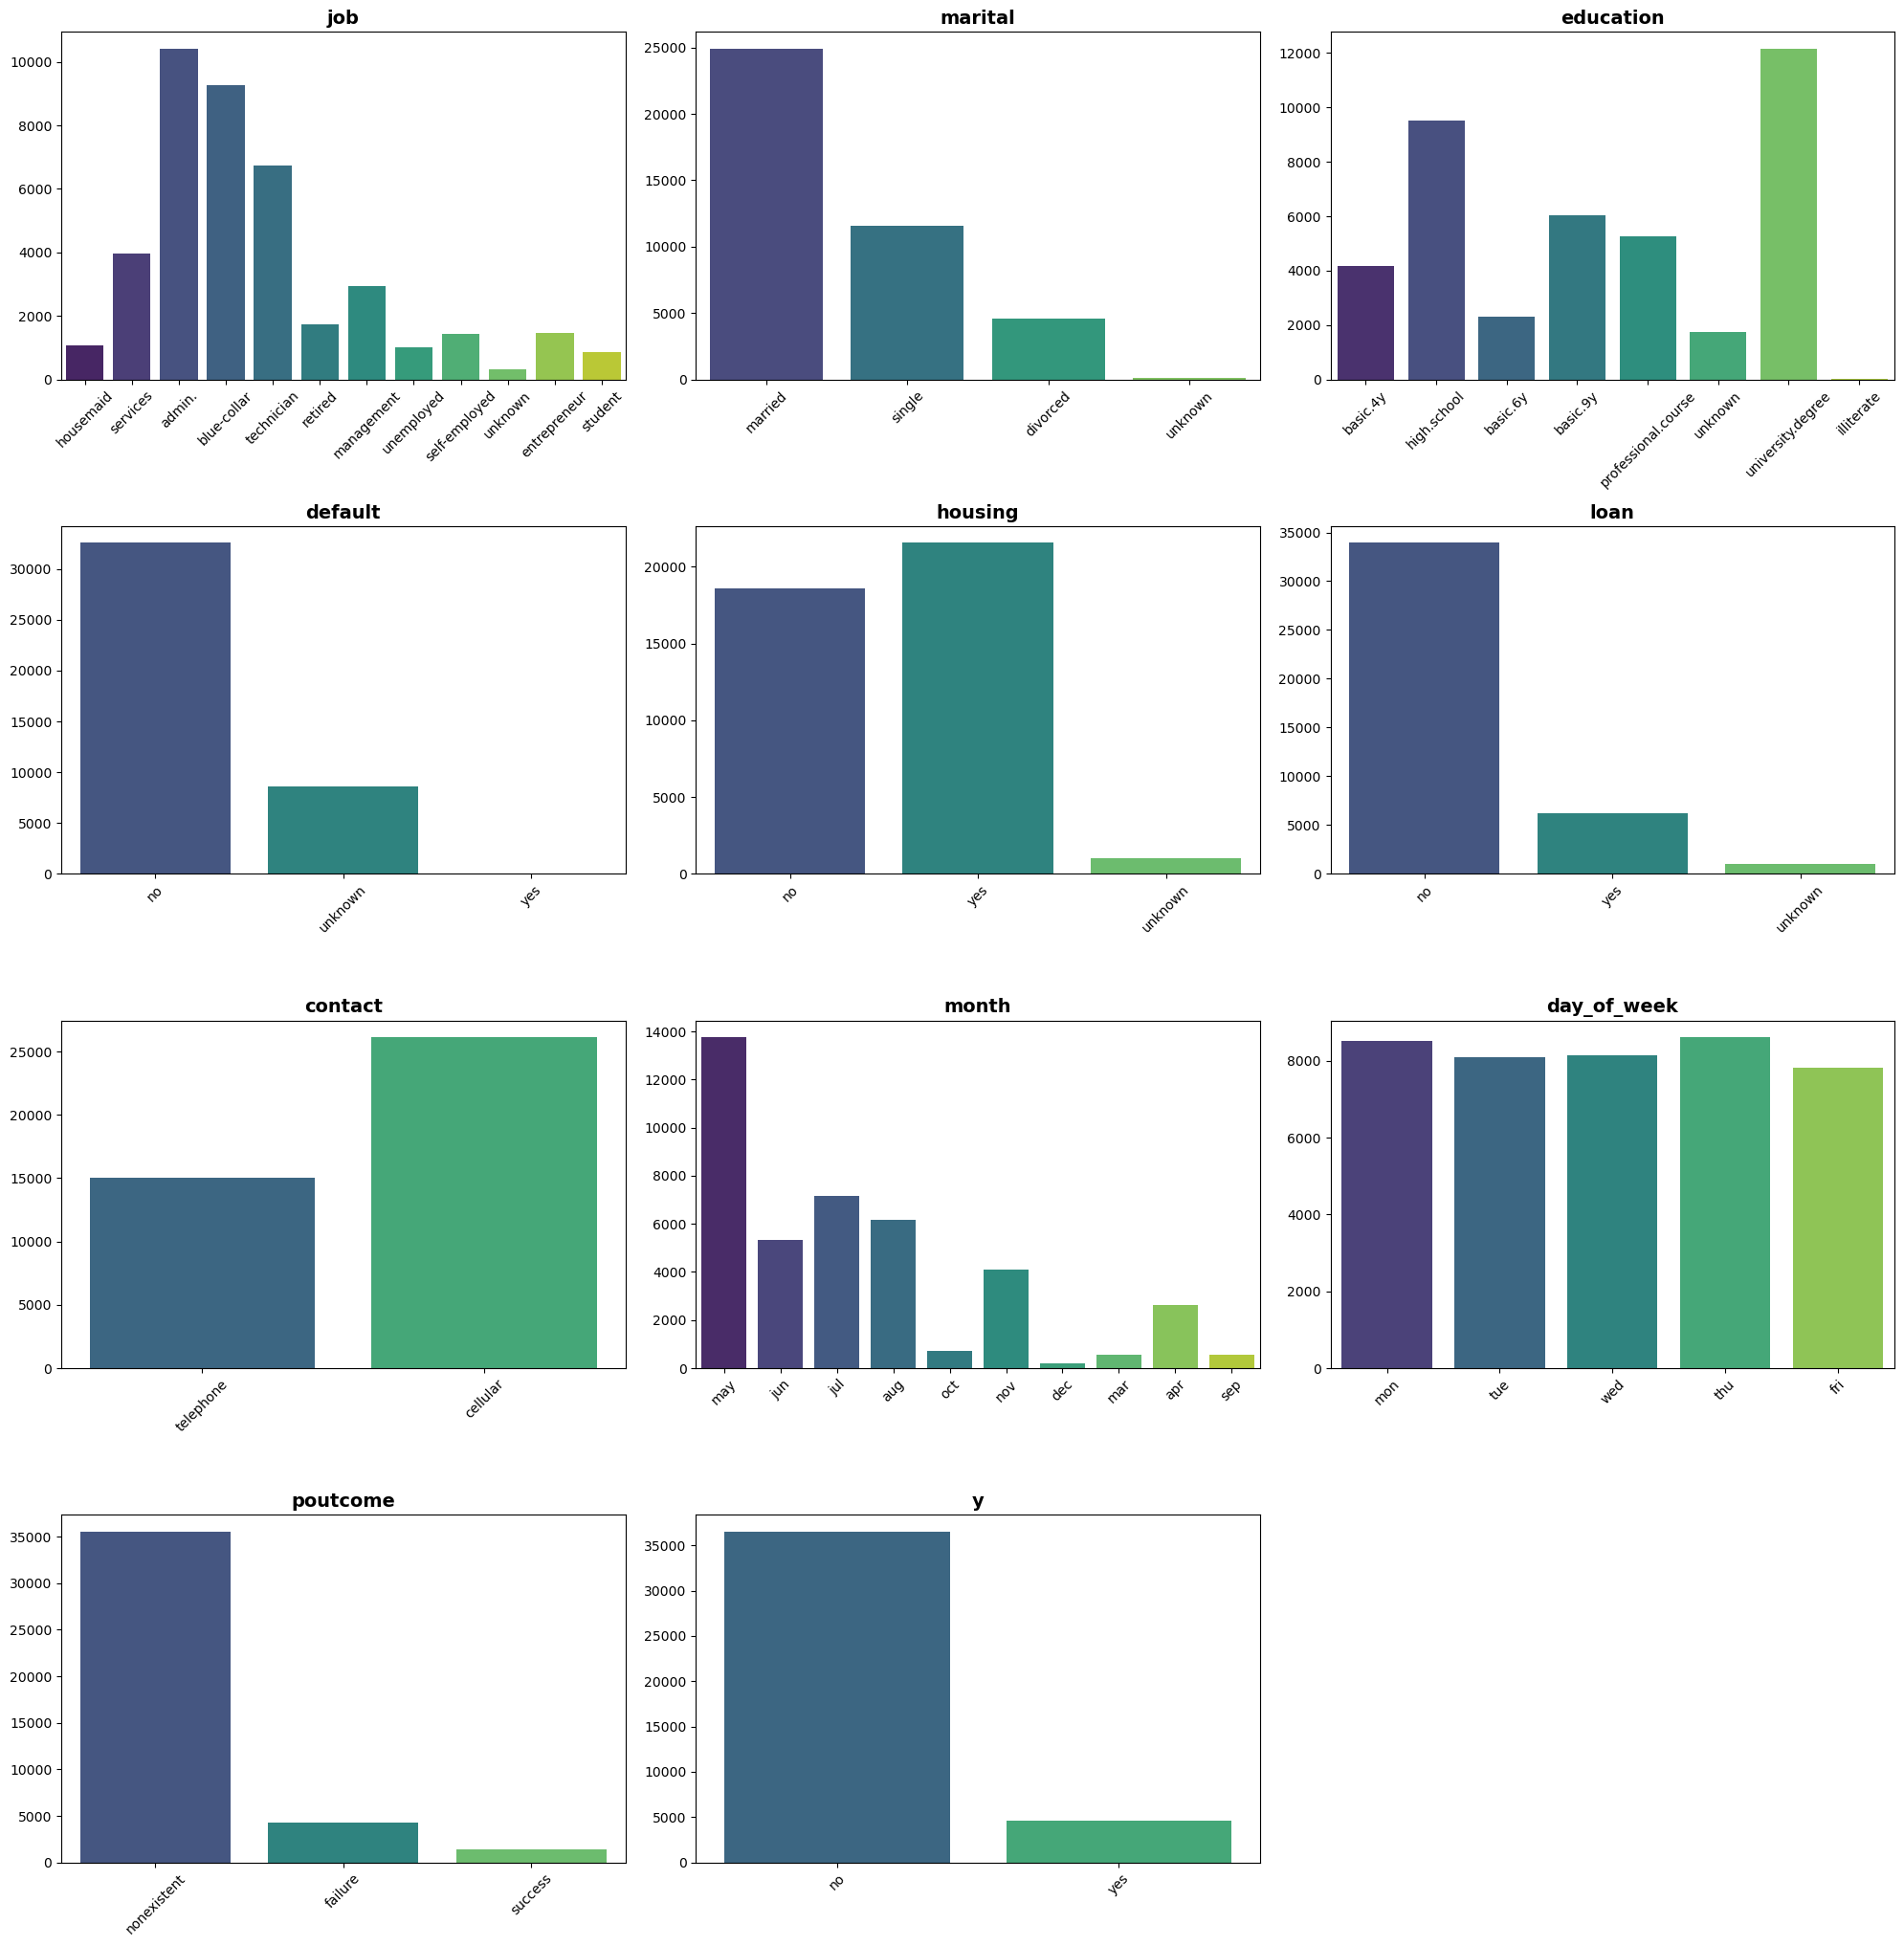

In [108]:
# Categorical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
                       'contact', 'month', 'day_of_week', 'poutcome', 'y']

plt.figure(figsize=(20, 30))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(6, 3, i)
    sns.countplot(data=df, x=column, palette='viridis')
    plt.title(column, fontsize=14, fontweight='bold') 
    plt.xlabel(None)
    plt.ylabel(None)
    plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()

In [109]:
summary_stats = df.describe()
summary_stats

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [110]:
# checking missing values 
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<h4> Bivariable Check

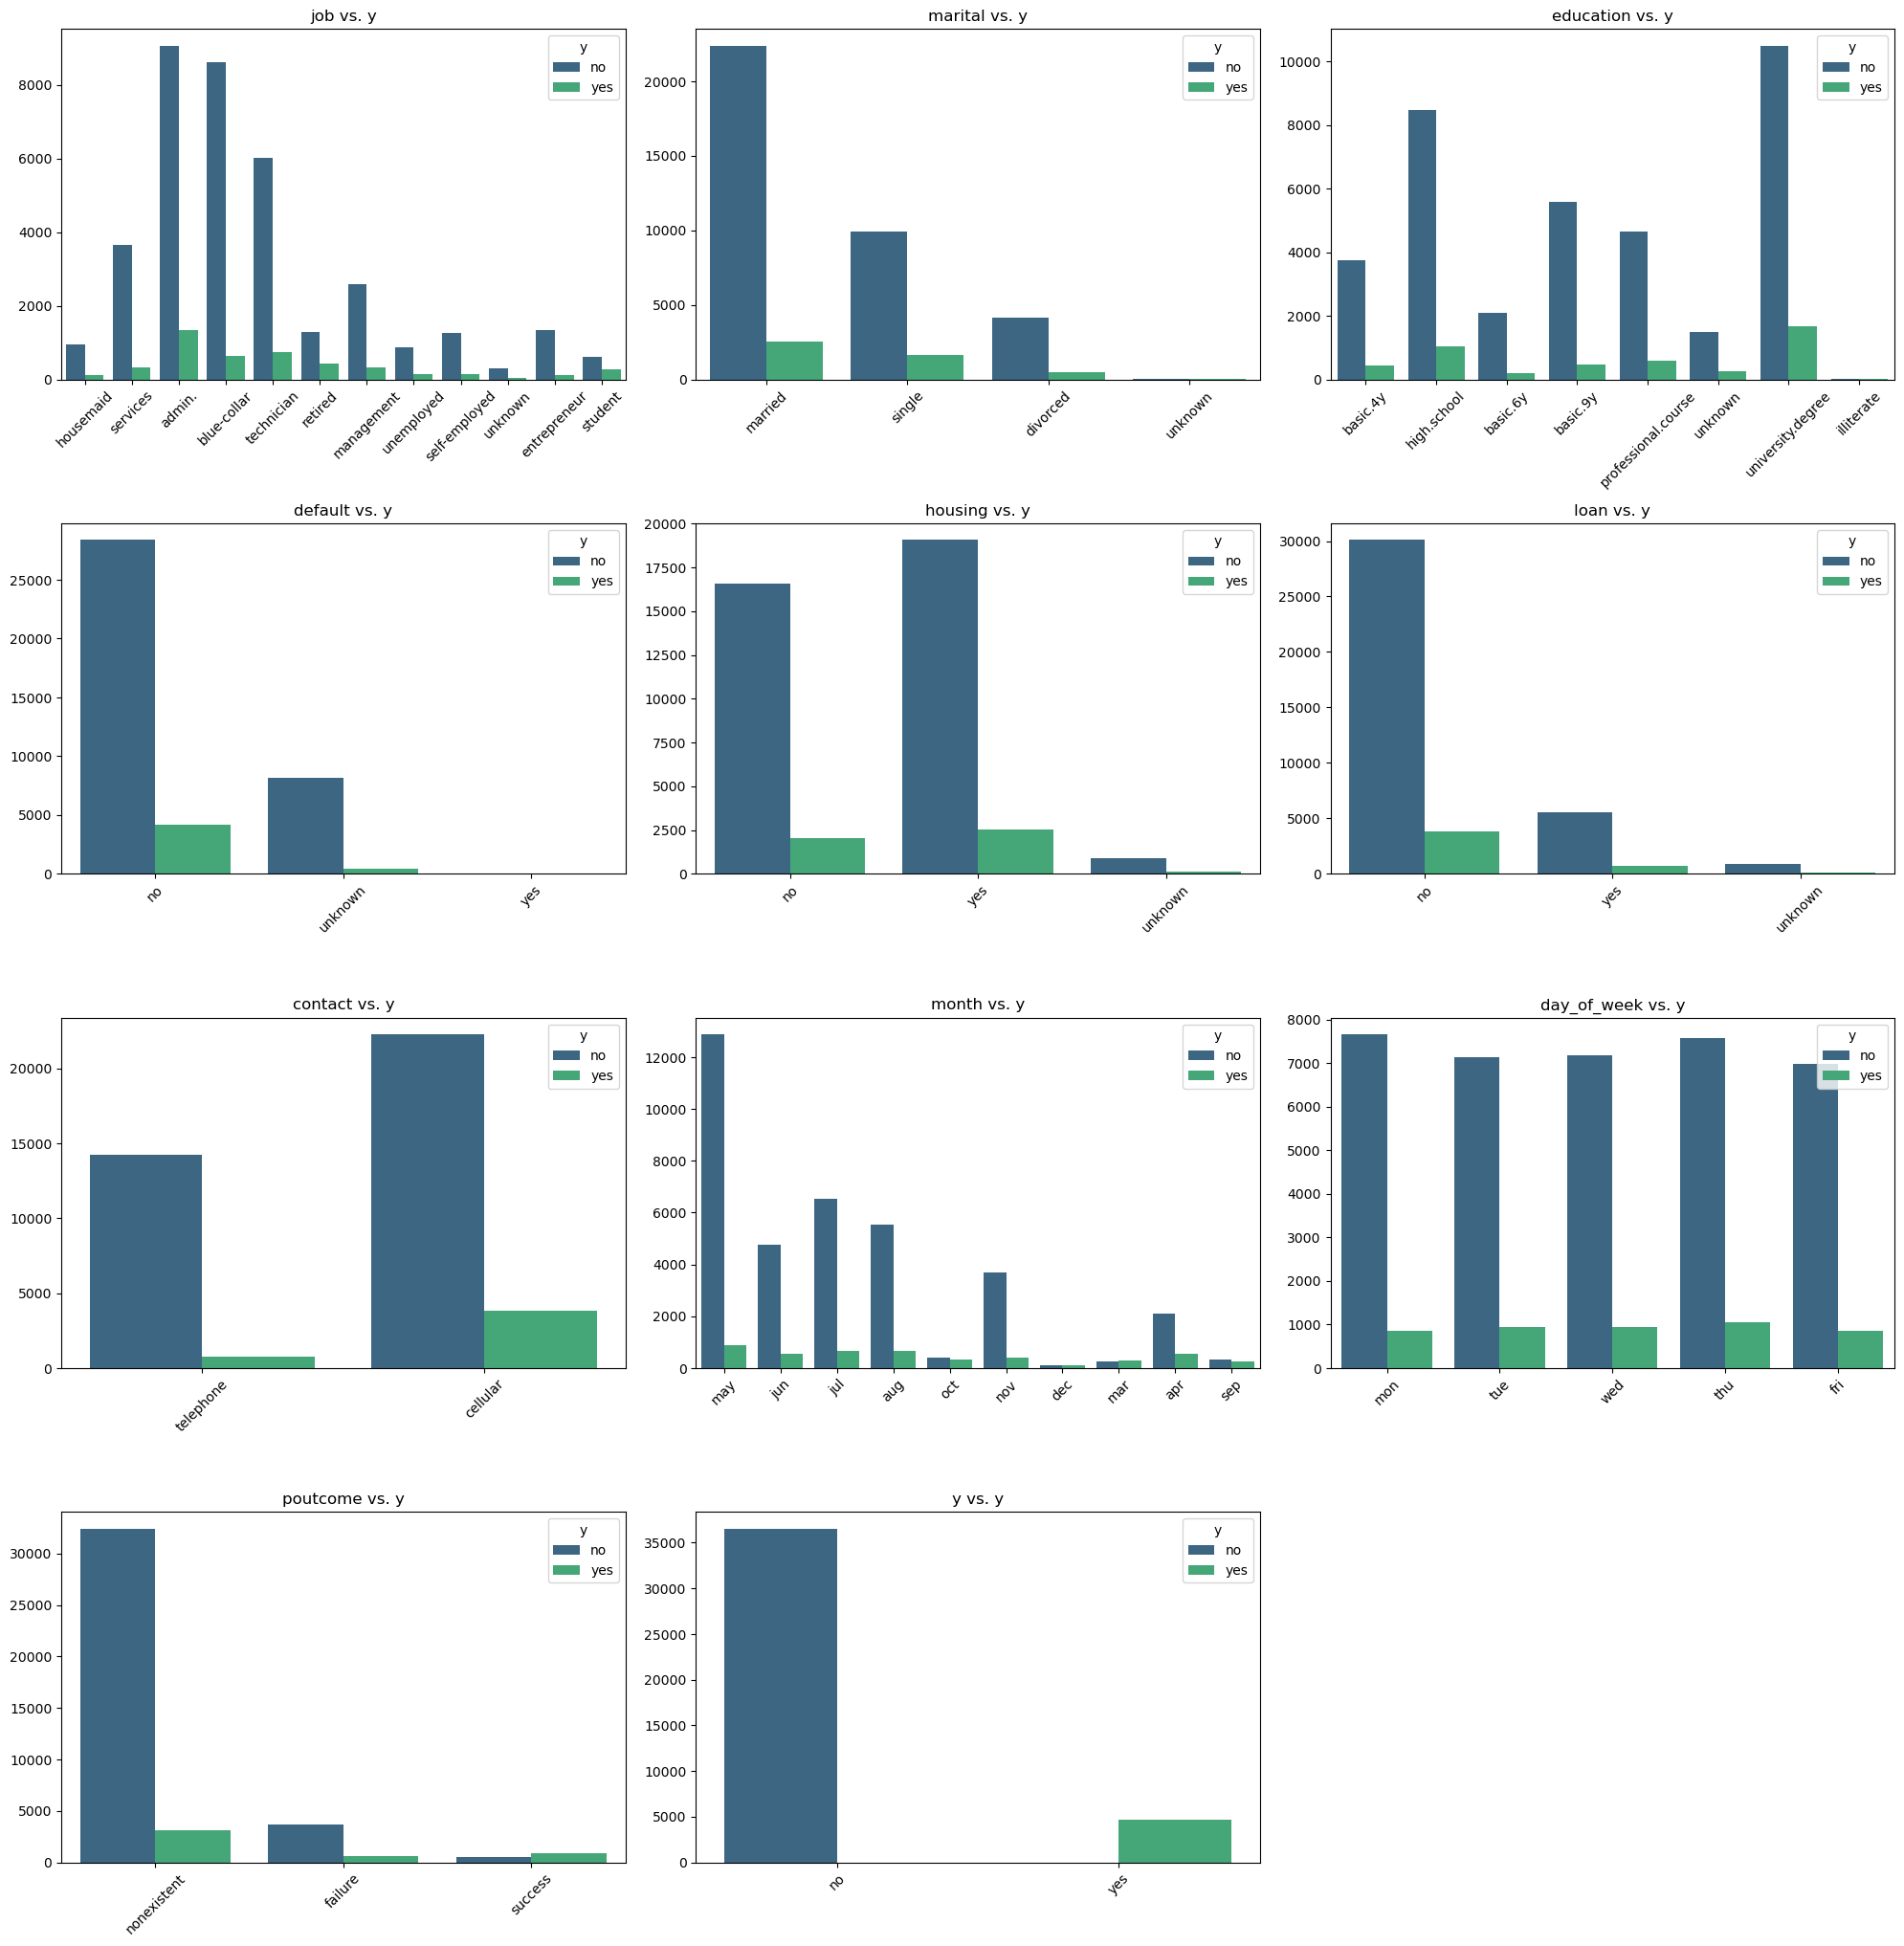

In [111]:
# Bivariable check

# Categorical
plt.figure(figsize=(20, 30))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(6, 3, i)
    sns.countplot(data=df, x=column, hue='y', palette='viridis')
    plt.title(f'{column} vs. y')
    plt.xlabel(None)
    plt.ylabel(None)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

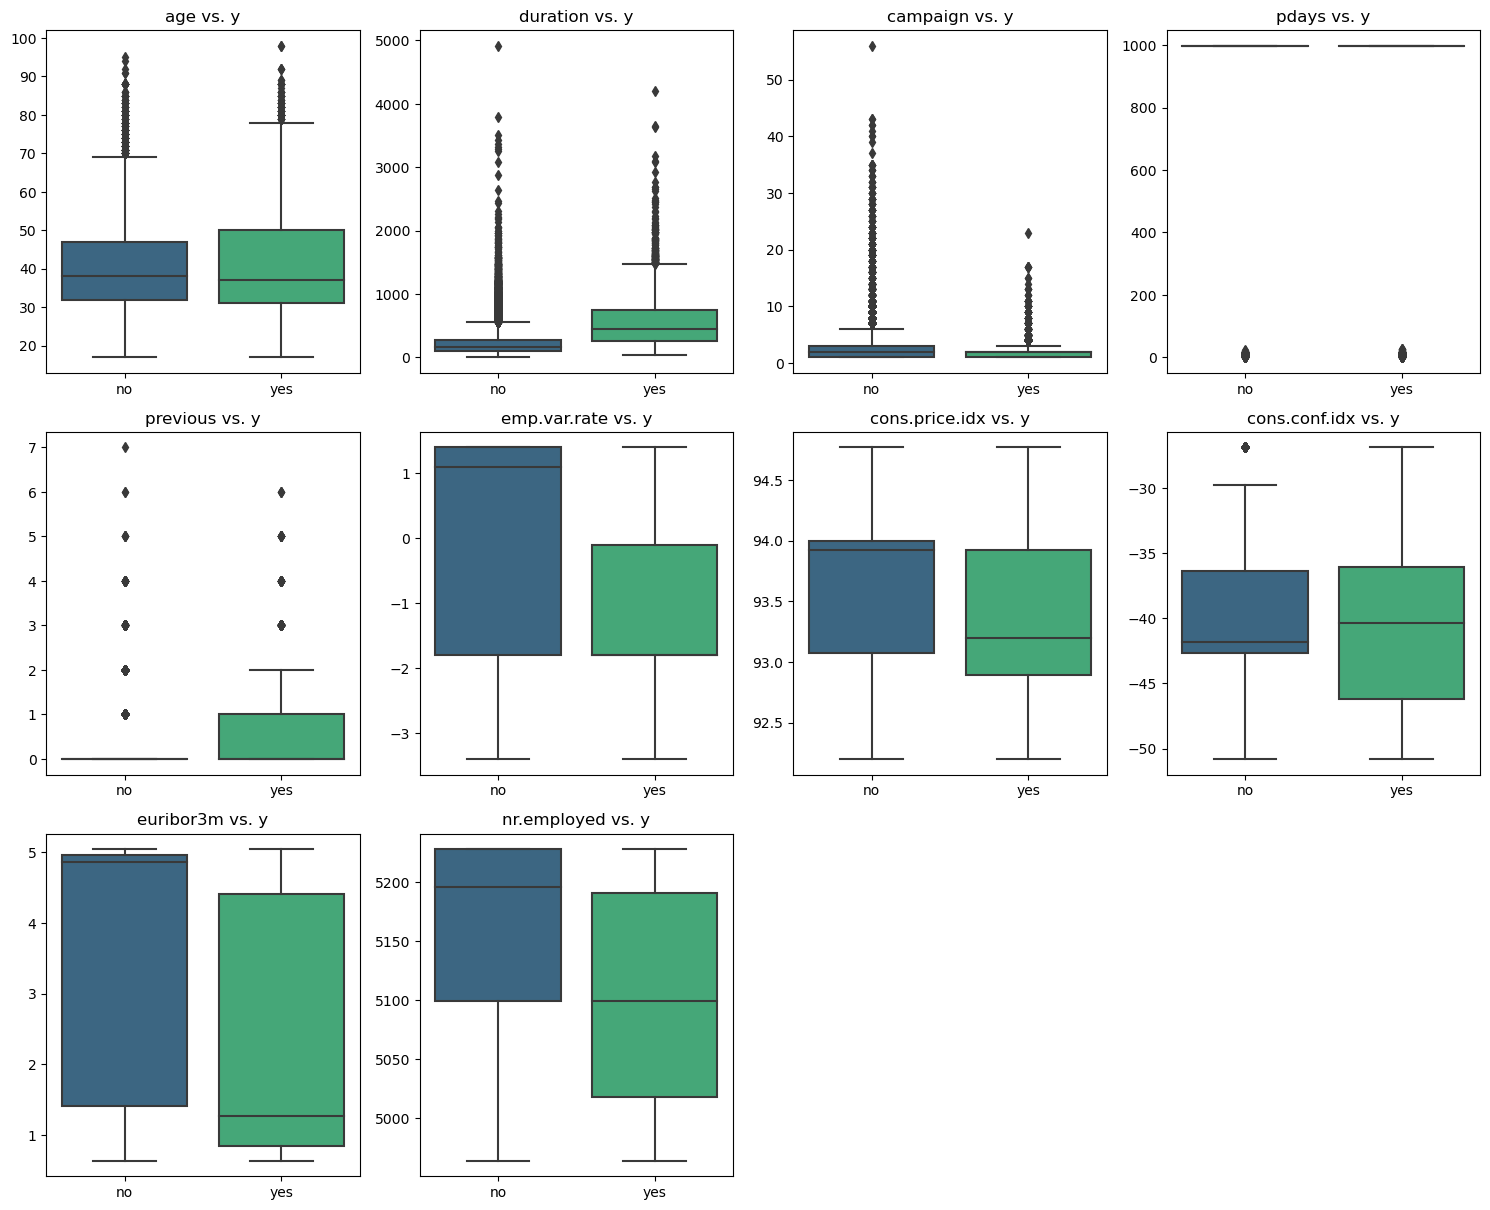

In [112]:
# Numerical 

plt.figure(figsize=(15, 20))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(data=df, x='y', y=column, palette='viridis')
    plt.title(f'{column} vs. y')
    plt.xlabel(None)
    plt.ylabel(None)

plt.tight_layout()
plt.show()

<h4> Correlation

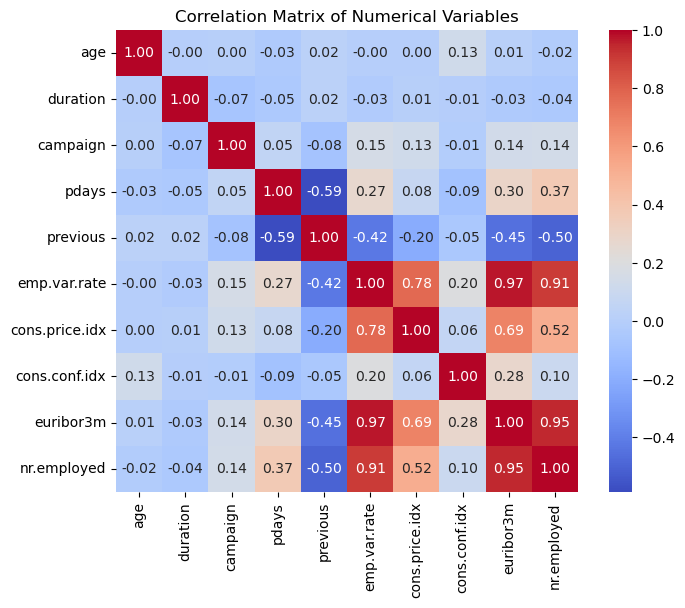

In [113]:
# correlation 

# Compute the correlation matrix
correlation_matrix = df[numerical_columns].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

<h3> Data Processing 

In [114]:
# Removing columns with high correlation ( More than 0.95)
variables_to_remove = ['euribor3m', 'nr.employed','emp.var.rate']  
#drop
df_filtered = df.drop(variables_to_remove, axis=1)

print(df_filtered.head(5))

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   cons.price.idx  cons.conf.idx   y  
0          93.994          -36.4  no  
1          93.994         

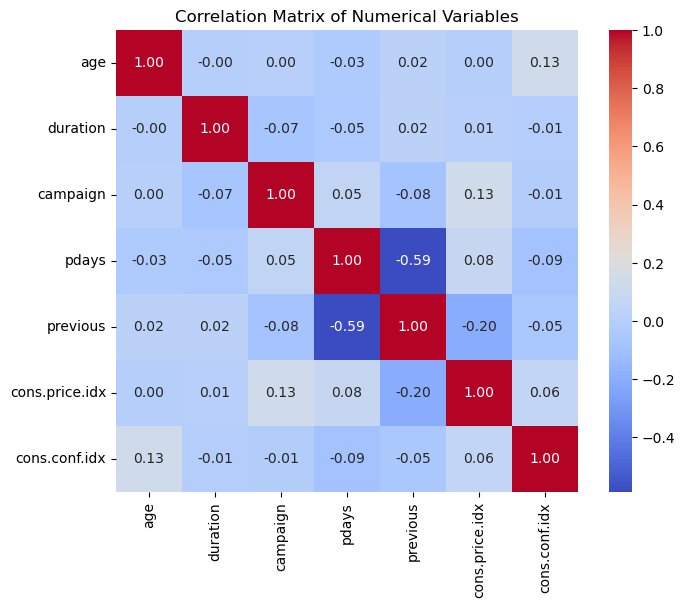

In [115]:
# checking the correlation again

# Numerical Columns
numerical_columns2 = ['age', 'duration', 'campaign', 'pdays', 'previous',
                     'cons.price.idx', 'cons.conf.idx'
                     ]

# Compute the correlation matrix
correlation_matrix = df_filtered[numerical_columns2].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

In [116]:
# Keeping the column I think is relevant to the model 

variables_to_remove2 = ['contact', 'month','day_of_week','poutcome']  
#drop
df_filtered = df_filtered.drop(variables_to_remove2, axis=1)
df_filtered.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'duration', 'campaign', 'pdays', 'previous', 'cons.price.idx',
       'cons.conf.idx', 'y'],
      dtype='object')

<h3> Categorical Treatment 

##### -- Marital 

In [117]:
df_filtered['marital'].value_counts()

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

###### Marital treatment decision: Remove category "Unknown"

In [118]:
df_filtered = df_filtered[df_filtered['marital'] != 'unknown']
df_filtered['marital'].value_counts()

marital
married     24928
single      11568
divorced     4612
Name: count, dtype: int64

##### -- Housing 

In [119]:
df_filtered['housing'].value_counts()

housing
yes        21541
no         18578
unknown      989
Name: count, dtype: int64

###### Housing treatment decision: Remove category "Unknown"

In [120]:
df_filtered = df_filtered[df_filtered['housing'] != 'unknown']
df_filtered['housing'].value_counts()

housing
yes    21541
no     18578
Name: count, dtype: int64

##### -- Loan 
###### Loan column doesn't need to remove the unkown category because as removing from the others it also removed from the Loan column

##### -- Education
###### Create a new category called " basic.education" by replacing the values 'basic.4y', 'basic.6y', and 'basic.9y' 

In [121]:
df_filtered['education'] = df_filtered['education'].replace(['basic.4y', 'basic.6y', 'basic.9y'], 'basic.education')
df_filtered['education'].value_counts()


education
basic.education        12166
university.degree      11860
high.school             9281
professional.course     5112
unknown                 1682
illiterate                18
Name: count, dtype: int64

##### -- Age
###### Age grouping by Equal-wigth Binning :  Divide the range of ages into a specified number of equal-width intervals. This approach ensures that each interval has the same width, but it may not capture variations in the distribution of ages.

In [122]:
num_bins = 5
# Create equal-width bins for ages
df_filtered['age_group'] = pd.cut(df_filtered['age'], bins=num_bins, labels=[f'Group {i+1}' for i in range(num_bins)])

df_filtered['age_group'].value_counts()

age_group
Group 2    19635
Group 1    12649
Group 3     7230
Group 4      508
Group 5       97
Name: count, dtype: int64

In [123]:
# Print the boundaries of each age group
print("Age Group Boundaries:")
print(df_filtered.groupby('age_group')['age'].min())
print(df_filtered.groupby('age_group')['age'].max())

Age Group Boundaries:
age_group
Group 1    17
Group 2    34
Group 3    50
Group 4    66
Group 5    82
Name: age, dtype: int64
age_group
Group 1    33
Group 2    49
Group 3    65
Group 4    81
Group 5    98
Name: age, dtype: int64


In [124]:
# removing age from df 
df_filtered = df_filtered.drop(columns=['age'])
df_filtered.head()

,job,marital,education,default,housing,loan,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,y,age_group
0,housemaid,married,basic.education,no,no,no,261,1,999,0,93.994,-36.4,no,Group 3
1,services,married,high.school,unknown,no,no,149,1,999,0,93.994,-36.4,no,Group 3
2,services,married,high.school,no,yes,no,226,1,999,0,93.994,-36.4,no,Group 2
3,admin.,married,basic.education,no,no,no,151,1,999,0,93.994,-36.4,no,Group 2
4,services,married,high.school,no,no,yes,307,1,999,0,93.994,-36.4,no,Group 3


##### -- Categorical Encoding

In [125]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing',
                     'loan', 'age_group','y']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode each categorical column
for column in cat_columns:
    df_filtered[column] = label_encoder.fit_transform(df_filtered[column])

df_filtered.head()

,job,marital,education,default,housing,loan,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,y,age_group
0,3,1,0,0,0,0,261,1,999,0,93.994,-36.4,0,2
1,7,1,1,1,0,0,149,1,999,0,93.994,-36.4,0,2
2,7,1,1,0,1,0,226,1,999,0,93.994,-36.4,0,1
3,0,1,0,0,0,0,151,1,999,0,93.994,-36.4,0,1
4,7,1,1,0,0,1,307,1,999,0,93.994,-36.4,0,2


<h4> Numerical Treatment 

##### -- Feature Scaling

In [128]:
num_columns = ['duration', 'campaign', 'pdays', 'previous', 'cons.price.idx', 'cons.conf.idx']

# Initialize StandardScaler
scaler = StandardScaler()

df_filtered[num_columns] = scaler.fit_transform(df_filtered[num_columns])
df_filtered.head()

,job,marital,education,default,housing,loan,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,y,age_group
0,3,1,0,0,0,0,0.010084,-0.566986,0.195436,-0.349162,0.725917,0.887357,0,2
1,7,1,1,1,0,0,-0.421805,-0.566986,0.195436,-0.349162,0.725917,0.887357,0,2
2,7,1,1,0,1,0,-0.124881,-0.566986,0.195436,-0.349162,0.725917,0.887357,0,1
3,0,1,0,0,0,0,-0.414093,-0.566986,0.195436,-0.349162,0.725917,0.887357,0,1
4,7,1,1,0,0,1,0.187468,-0.566986,0.195436,-0.349162,0.725917,0.887357,0,2


<h3> ML Model


##### -- Split the data

In [130]:
X = df_filtered.drop(columns=['y'])  # Features
y = df_filtered['y']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (32095, 13) (32095,)
Testing set shape: (8024, 13) (8024,)


##### -- Logistic Regression

Accuracy: 0.900049850448654


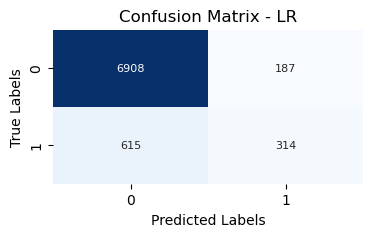

In [192]:
from sklearn.linear_model import LogisticRegression # Library

model = LogisticRegression(random_state=42)

model.fit(X_train, y_train) # Train the model on the training set

y_pred_lr = model.predict(X_test) # Make predictions on the testing set

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"fontsize":8})
plt.title('Confusion Matrix - LR')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

###### Logistic Regression achieved an accuracy of 90.0% and demonstrated good performance in classifying the target variable. It correctly classified 6908 instances of the negative class (no) and 314 instances of the positive class (yes).

[[TN  FP]

 [FN  TP]]

##### -- Decision Tree

Accuracy: 0.8859670987038883


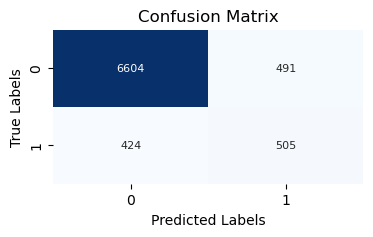

In [179]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()

dt_classifier.fit(X_train, y_train) # Train the decision tree classifier

y_pred_dt = dt_classifier.predict(X_test) # Make predictions on the testing set


accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy_dt)

# Calculate confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"fontsize":8})
plt.title('Confusion Matrix - DT')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

###### Decision Tree achieved an accuracy of 88.3%. It correctly classified 6604 instances of the negative class and 505 instances of the positive class.

##### -- Random Forests

Accuracy: 0.9002991026919243


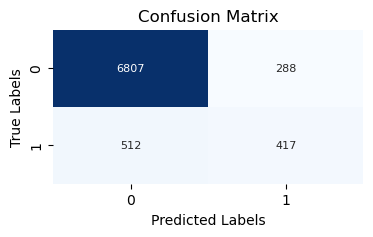

In [180]:
from sklearn.ensemble import RandomForestClassifier # Library

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train) # Train classifier


y_pred_rf = rf_classifier.predict(X_test) # Predict on the test set

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)

# Calculate confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"fontsize":8})
plt.title('Confusion Matrix - RF')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

###### Random Forest achieved an accuracy of 90.2% and demonstrated robust performance. It correctly classified 6807 instances of the negative class and 417 instances of the positive class.

##### -- Support Vector Machines (SVM)

Accuracy: 0.8995513459621136


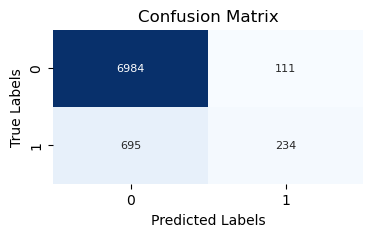

In [181]:
from sklearn.svm import SVC # Library


svm_classifier = SVC()
svm_classifier.fit(X_train, y_train) # Train classifier


y_pred_svm = svm_classifier.predict(X_test) # Predict on the test set

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy_svm)

# Calculate confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"fontsize":8})
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

###### SVM achieved an accuracy of 90.0%. It correctly classified 6984 instances of the negative class and 234 instances of the positive class.

##### -- Gradient Boosting 

Accuracy: 0.9086490528414756


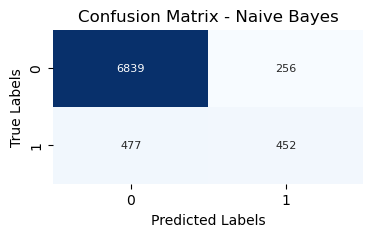

In [172]:
from sklearn.ensemble import GradientBoostingClassifier # Library


gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train) # Train classifier

y_pred_gb = gb_classifier.predict(X_test) # Predict on the test set


# Calculate accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy:", accuracy_gb)

# Calculate confusion matrix
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"fontsize":8})
plt.title('Confusion Matrix - NB')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

###### Gradient Boosting achieved an accuracy of 90.9% and demonstrated excellent performance. It correctly classified 6839 instances of the negative class and 452 instances of the positive class.

##### -- KNN 

KNN Accuracy: 0.892198404785643


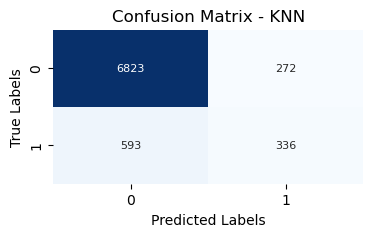

In [171]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train) # Train the KNN classifier

y_pred_knn = knn.predict(X_test) # Predict on the testing set

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)


cm_knn = confusion_matrix(y_test, y_pred_knn)

# Confusion matrix 
plt.figure(figsize=(4, 2))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"fontsize":8})
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

###### KNN achieved an accuracy of 89.2%. It correctly classified 6823 instances of the negative class and 336 instances of the positive class.

##### -- Naive Bayes

Naive Bayes Accuracy: 0.889456630109671


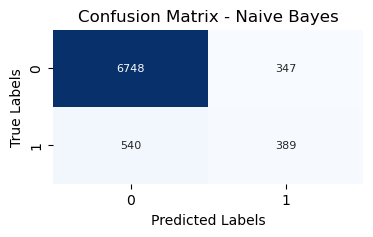

In [170]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()


nb.fit(X_train, y_train) # Train the Naive Bayes classifier
y_pred_nb = nb.predict(X_test) # Predict on the testing set

accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)

cm_nb = confusion_matrix(y_test, y_pred_nb)

# Confusion matrix for Naive Bayes
plt.figure(figsize=(4, 2))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"fontsize":8})
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

###### Naive Bayes achieved an accuracy of 88.9%. It correctly classified 6748 instances of the negative class and 389 instances of the positive class.

###### In summary, Gradient Boosting achieved the highest accuracy among the classifiers tested, followed closely by Random Forest. These models demonstrated robust performance in predicting the target variable. 

<h3> Feature Importance </h3>

###### Feature importance analysis is a technique used to determine the relative importance of each feature in predicting the target variable. 

##### Extracting feature importance from Gradient Boosting and Random Forest classifiers, considering they exhibited the best performance

##### - Gradient Boosting Feature Importance 

In [189]:

feature_importances_gb = gb_classifier.feature_importances_

# Display feature importances
feature_importance_df_gb = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances_gb})
feature_importance_df_gb = feature_importance_df_gb.sort_values(by='Importance', ascending=False)
print("Gradient Boosting Feature Importance:")
print(feature_importance_df_gb)


Gradient Boosting Feature Importance:
           Feature  Importance
6         duration    0.449408
8            pdays    0.211973
11   cons.conf.idx    0.192609
10  cons.price.idx    0.114420
12       age_group    0.009168
9         previous    0.008324
3          default    0.005169
2        education    0.003643
7         campaign    0.003206
0              job    0.001631
1          marital    0.000203
5             loan    0.000139
4          housing    0.000106


##### - Random Forest Feature Importance

In [190]:
feature_importances_rf = rf_classifier.feature_importances_

# Display feature importances
feature_importance_df_rf = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances_rf})
feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False)
print("Random Forest Feature Importance:")
print(feature_importance_df_rf)

Random Forest Feature Importance:
           Feature  Importance
6         duration    0.383752
11   cons.conf.idx    0.107900
10  cons.price.idx    0.085974
8            pdays    0.080620
0              job    0.068586
7         campaign    0.060461
2        education    0.049182
12       age_group    0.045446
9         previous    0.033405
1          marital    0.031473
4          housing    0.025164
5             loan    0.017168
3          default    0.010871


#### Gradient Boosting:

<p>Duration: This feature has the highest importance, indicating that the duration of the call has a significant impact on the outcome.</p>
<p> Pdays: The number of days that passed after the client was last contacted from a previous campaign is also a crucial factor.</p>
<p> Cons.conf.idx and Cons.price.idx: These are economic indicators, suggesting that the overall economic context plays a role. </p>
<p> Age Group and Previous Contacts: These features have relatively lower importance but still contribute to the model. </p>

#### Random Forest:
<p> Duration: Similarly, the duration of the call is the most critical predictor in the Random Forest model.
<p> Cons.conf.idx and Cons.price.idx: Economic indicators remain significant in this model as well.
<p> Job and Campaign: Job type and number of contacts during this campaign also have notable importance.
<p> Education and Age Group: These features also contribute significantly to the model's predictions.

### Conclusion:

Both models highlight the importance of the call duration and economic indicators (cons.conf.idx and cons.price.idx).
Other factors such as job type, education level, and age group also play essential roles in predicting the outcome of the marketing campaign.
Overall, these insights can guide marketing strategies to focus on specific customer demographics and tailor communication strategies based on economic conditions and call duration.

Double Checking if the Gradient Boosting and Random Forest are the best among others classifiers comparing through Precision, Recall, and F1 score

In [198]:
# Define the evaluation function
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, pos_label=1)
    recall = recall_score(y_true, y_pred, pos_label=1)
    f1 = f1_score(y_true, y_pred, pos_label=1)
    return accuracy, precision, recall, f1

# Evaluate each classifier
classifiers = {
    "Logistic Regression": y_pred_lr,
    "Decision Tree": y_pred_dt,
    "Gradient Boosting": y_pred_gb,
    "Random Forest": y_pred_rf,
    "Support Vector Machine (SVM)": y_pred_svm,
    "K-Nearest Neighbors (KNN)": y_pred_knn,
    "Naive Bayes": y_pred_nb
}

for clf_name, y_pred in classifiers.items():
    accuracy, precision, recall, f1 = evaluate_model(y_test, y_pred)
    print(f"{clf_name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")

Logistic Regression:
  Accuracy: 0.9000
  Precision: 0.6267
  Recall: 0.3380
  F1 Score: 0.4392
Decision Tree:
  Accuracy: 0.8860
  Precision: 0.5070
  Recall: 0.5436
  F1 Score: 0.5247
Gradient Boosting:
  Accuracy: 0.9086
  Precision: 0.6384
  Recall: 0.4865
  F1 Score: 0.5522
Random Forest:
  Accuracy: 0.9003
  Precision: 0.5915
  Recall: 0.4489
  F1 Score: 0.5104
Support Vector Machine (SVM):
  Accuracy: 0.8996
  Precision: 0.6783
  Recall: 0.2519
  F1 Score: 0.3673
K-Nearest Neighbors (KNN):
  Accuracy: 0.8922
  Precision: 0.5526
  Recall: 0.3617
  F1 Score: 0.4372
Naive Bayes:
  Accuracy: 0.8895
  Precision: 0.5285
  Recall: 0.4187
  F1 Score: 0.4673


ROC Curve form Gradient Boosting and Random Forest 

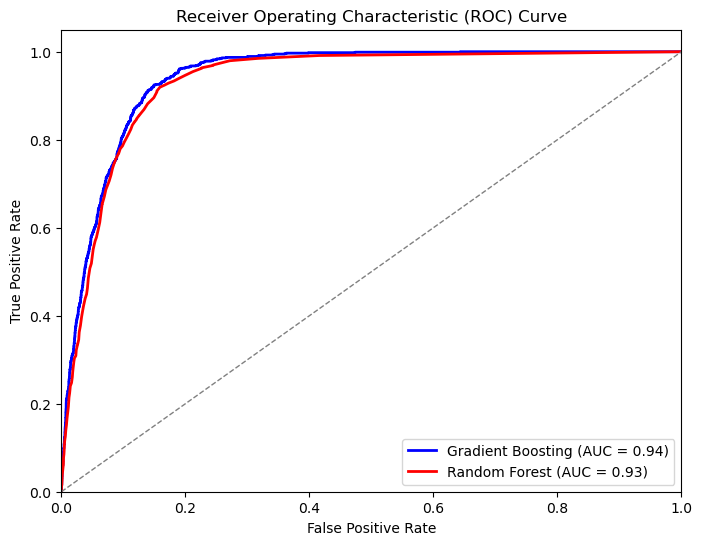

In [202]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute predicted probabilities for Gradient Boosting and Random Forest
y_prob_gb = gb_classifier.predict_proba(X_test)[:, 1]
y_prob_rf = rf_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for Gradient Boosting
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Compute ROC curve and ROC area for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color='blue', lw=2, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Downloads 

In [203]:
# Export training and testing datasets along with labels to CSV files
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)


In [209]:
evaluation_results = {
    "Classifier": ["Logistic Regression", "Decision Tree", "Gradient Boosting", "Random Forest", "SVM", "KNN", "Naive Bayes"],
    "Accuracy": [0.9000, 0.8860, 0.9086, 0.9003, 0.8996, 0.8922, 0.8895],
    "Precision": [0.6267, 0.5070, 0.6384, 0.5915, 0.6783, 0.5526, 0.5285],
    "Recall": [0.3380, 0.5436, 0.4865, 0.4489, 0.2519, 0.3617, 0.4187],
    "F1 Score": [0.4392, 0.5247, 0.5522, 0.5104, 0.3673, 0.4372, 0.4673],
    "AUC": [0.89, 0.73, 0.94, 0.93, 0.85, 0.83, 0.85 ]
}
evaluation_df = pd.DataFrame(evaluation_results)
evaluation_df.to_csv('evaluation_results.csv', index=False)


In [208]:
# getting  the AUC for all the models 
from sklearn.metrics import roc_auc_score

# Example values for y_prob, replace with actual values
y_prob_lr = model.predict_proba(X_test)[:, 1]
y_prob_dt = dt_classifier.predict_proba(X_test)[:, 1]
y_prob_svm = svm_classifier.decision_function(X_test)
y_prob_knn = knn.predict_proba(X_test)[:, 1]
y_prob_nb = nb.predict_proba(X_test)[:, 1]

# Calculate AUC for each classifier
auc_lr = roc_auc_score(y_test, y_prob_lr)
auc_dt = roc_auc_score(y_test, y_prob_dt)
auc_svm = roc_auc_score(y_test, y_prob_svm)
auc_knn = roc_auc_score(y_test, y_prob_knn)
auc_nb = roc_auc_score(y_test, y_prob_nb)

# Update the dictionary
print(auc_lr, auc_dt, auc_svm, auc_knn, auc_nb)


0.888811766499703 0.7371636357567718 0.8549705632690587 0.8285992576527536 0.8498886782562652


![Alt Text](DASH.png)